# Exploratory Data Analysis for Machine Learning

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv("./telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Discovery

In [118]:
df.shape

(3333, 20)

In [119]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [122]:
df["Area code"] = df["Area code"].astype("object")

In [123]:
df.describe(include=["float64", "int64"])

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [83]:
df["Churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [124]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [125]:
#### Convert the churn to Numeric
df["Churn"] = df["Churn"].astype("int64")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [130]:
df.duplicated().sum()

0

## Univariate Analysis

#### Numerical Variables

             value
count  3333.000000
mean    179.775098
std      54.467389
min       0.000000
25%     143.700000
50%     179.400000
75%     216.400000
max     350.800000


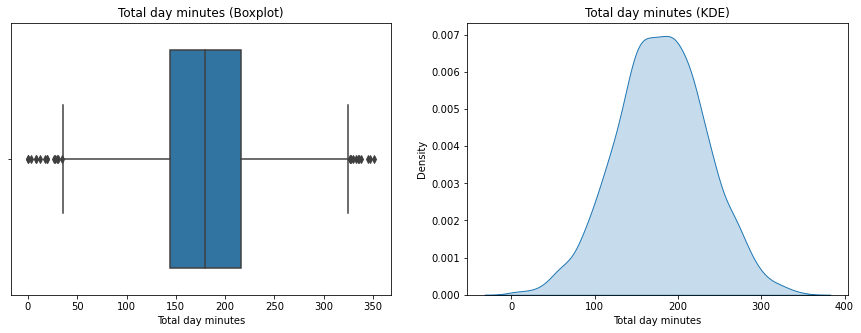

Total day minutes[Skewness]: -0.029063979518119797
Total day minutes[Kurtosis]: -0.021710117924088834


In [131]:
def numeric_univariate(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Description
    description = df[column].describe()
    describe_df = pd.DataFrame(description)
    describe_df.columns = ["value"]
    print(describe_df)

    # Boxplot
    sns.boxplot(ax=axes[0], data=df, x=column)
    axes[0].set_title(f"{column} (Boxplot)")

    # Distribution
    sns.kdeplot(ax=axes[1], data=df, x=column, shade=True)
    axes[1].set_title(f"{column} (KDE)")
    plt.show()
    
    #Skewness
    print(f'{column}[Skewness]: {scipy.stats.skew(df[column])}')
    print(f'{column}[Kurtosis]: {scipy.stats.kurtosis(df[column])}')
numeric_univariate("Total day minutes")

#### Binning
- Binning is a technique that is used for reducing the cardinality of continuous and discrete data. 
- Binning related values together in multiple bins is used to reduce the number of distinct values.
- Binning method is used to smoothing data or to handle noisy data

In [132]:
day_minutes_ranges = [f"{mins + 0.1} - {mins + 90}" for mins in range(0, 360, 90)]
day_minutes_ranges

['0.1 - 90', '90.1 - 180', '180.1 - 270', '270.1 - 360']

In [133]:
# Define the function which take two argument, the range of bins as rng and the 'Total day minutes' as x column.
def binMinutes(rng,x):
    # loop through the bins and split each of them to obtain the upper and lower boundaries for each bin.
    for i in rng:
        lower = i.split(' - ')[0]
        upper = i.split(' - ')[1]
        # Check the range in which each value of the of Total day minutes lies.
        if float(x) <= float(upper) and float(x)  >= float(lower):
            # return the bin.
            return f'({i})'
                
                
df['Binned-Total_day_minutes'] = df['Total day minutes'].apply(lambda x: binSepals(day_minutes_ranges,x))

In [134]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Binned-Total_day_minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,(180.1 - 270)
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,(90.1 - 180)
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,(180.1 - 270)
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,(270.1 - 360)
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,(90.1 - 180)


In [135]:
Total_day_minutes = pd.DataFrame(df['Binned-Total_day_minutes'].value_counts()).reset_index()
Total_day_minutes.columns = ['Bin', 'Count']
Total_day_minutes

,Bin,Count
0,(90.1 - 180),1513
1,(180.1 - 270),1481
2,(270.1 - 360),171
3,(0.1 - 90),166


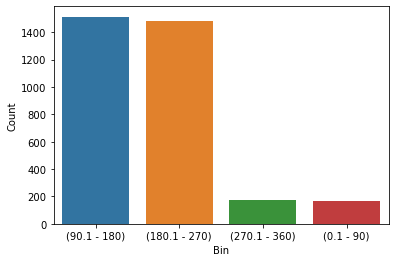

In [136]:
sns.barplot(data=Total_day_minutes, x="Bin", y="Count")
plt.show()

#### Categorical Variables

In [137]:
df_cat = df[[col for col in df.columns if df[col].dtype=="object"]]

In [138]:
df_cat.head()

,State,Area code,International plan,Voice mail plan,Binned-Total_day_minutes
0,KS,415,No,Yes,(180.1 - 270)
1,OH,415,No,Yes,(90.1 - 180)
2,NJ,415,No,No,(180.1 - 270)
3,OH,408,Yes,No,(270.1 - 360)
4,OK,415,Yes,No,(90.1 - 180)


In [139]:
df_cat["Voice mail plan"].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [140]:
voice_plan_frequency = df_cat.groupby(["Voice mail plan"]).size().reset_index(name="Count")
voice_plan_frequency

,Voice mail plan,Count
0,No,2411
1,Yes,922


In [141]:
voice_plan_frequency['Count%'] = voice_plan_frequency['Count']/sum(voice_plan_frequency['Count'])*100
voice_plan_frequency

,Voice mail plan,Count,Count%
0,No,2411,72.337234
1,Yes,922,27.662766


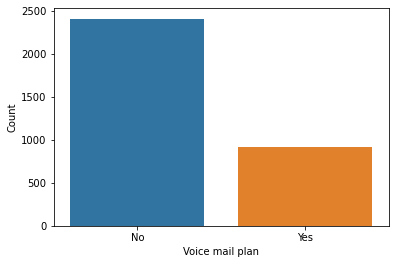

In [142]:
sns.barplot(data=voice_plan_frequency, x='Voice mail plan', y='Count')
plt.show()

### Bi-Variate Analysis
#### Numerical-Numerical Variable Analysis

##### Scatter Plot
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.
- It shows the relationship between the two variables

In [143]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Binned-Total_day_minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,(180.1 - 270)
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,(90.1 - 180)
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,(180.1 - 270)
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,(270.1 - 360)
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,(90.1 - 180)


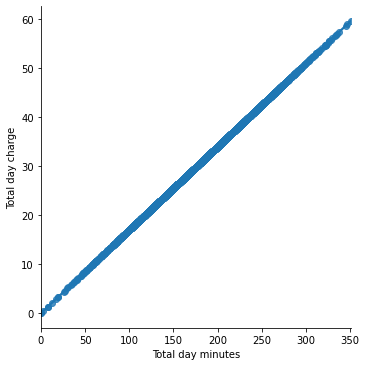

In [144]:
sns.lmplot(x='Total day minutes', y='Total day charge', data=df)
plt.show()

#### Correlation
Correlation or dependence is any statistical relationship between two random variables or bivariate data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about the effect.
Correlation coefficients are used to measure the strength of the linear relationship between two variables.

A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship

A value of zero indicates no relationship between the two variables being compared.

A negative correlation, or inverse correlation, is a key concept in the creation of diversified portfolios that can better withstand portfolio volatility.

Calculating the correlation coefficient is time-consuming, so data are often plugged into a calculator, computer, or statistics program to find the coefficient.

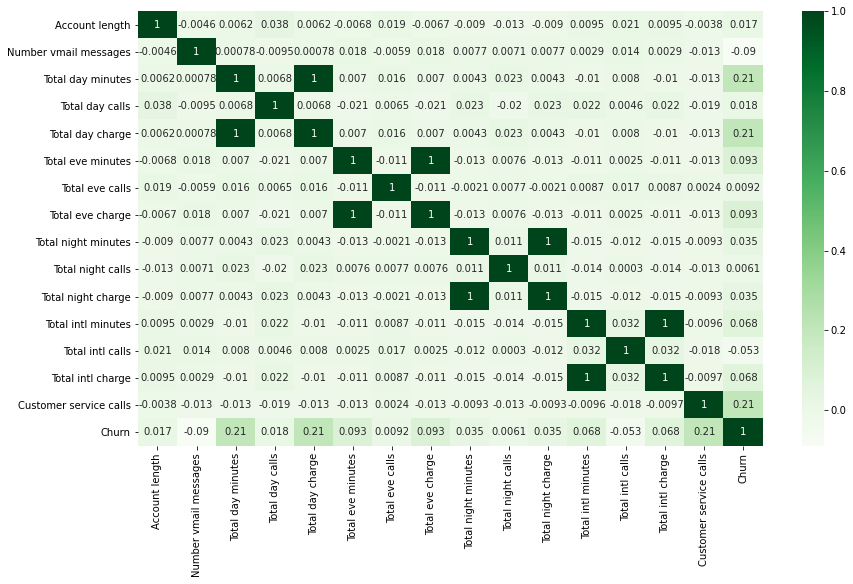

In [145]:
plt.figure(figsize=(14,8))
df.drop(["Account length", "Area code", "Churn"], axis=1)
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

#### Categorical Variables

In [146]:
df2 = pd.read_csv('Train.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [147]:
pd.crosstab(df2.Item_Type,df2.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


In [107]:
df_plot = df2.groupby(['Outlet_Size']).Item_Type.value_counts().reset_index(name='Counts')
df_plot.head()

,Outlet_Size,Item_Type,Counts
0,High,Fruits and Vegetables,142
1,High,Snack Foods,125
2,High,Household,103
3,High,Frozen Foods,92
4,High,Dairy,80


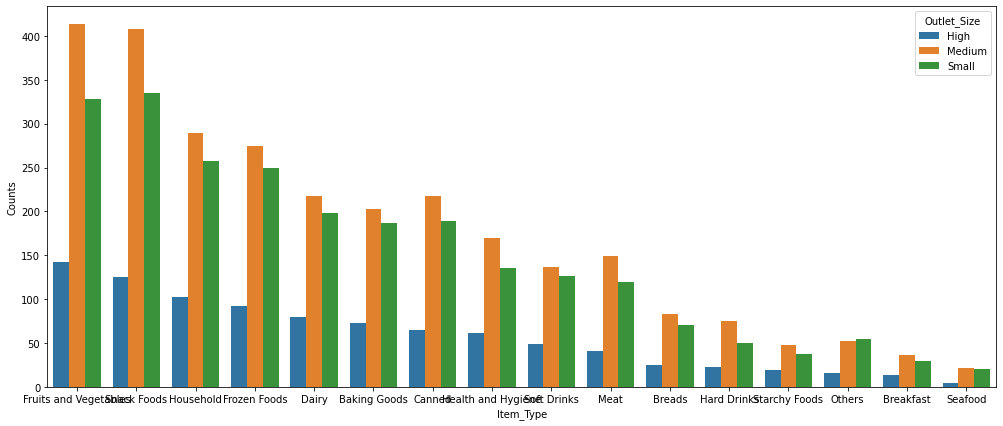

In [111]:
figure = plt.figure(figsize=(17,7))
#df_plot.plot(x=df_plot.index, kind='bar', stacked=True)
sns.barplot(data=df_plot, x='Item_Type', y='Counts', hue='Outlet_Size')
plt.show()

## END ✌✌